In [46]:
import numpy as np 
import matplotlib.pyplot as plt

In [47]:
def function_A(t,ti,tf):
    d = tf - ti 
    rows = []
    for i in range(3) : 
        T = (t[i]-ti)/(tf - ti)
#         rows.append([(1-T)**5,5*T*((1-T)**4),10*T*T*((1-T)**3),10*T*T*T*((1-T)**2),5*(T**4)*(1-T),T**5])
        rows.append([(1-T)**5 , 5*T*(1-T)**4 , 10*(T**2)*(1-T)**3 , 10*(T**3)*(1-T)**2 , 5*(T**4)*(1-T)**1 , (T**5)*(1-T)**0])
    
    for i in range(3,6):
        T = (t[i]-ti)/(tf - ti)
#         rows.append([(-5*(1-T)**4)/d,5*((-T*(4*(1-T)**3)/d)+((1-T)**4)/d),10*((-T**2*(3*(1-T)**2)/d)+2*T*((1-T)**3)/d),10*((-T**3*(2*(1-T))/d)+3*(T**2)*((1-T)**2)/d),5*(-T**4)/d + ((1-T)*4*T**3)/d, 5*(T**4)/d])
        rows.append([-5*((1-T)**4)/d, 5/d*(-4*(T**1)*(1-T)**3)+5/d*(1-T)**4, 10/d*(-3*(T**2)*(1-T)**2)+10/d*(2*T)*(1-T)**3, 10/d*(-2*(T**3)*(1-T))+10/d*(3*T**2)*(1-T)**2, 5/d*(-1*(T)**4)+5/d*(4*T**3)*(1-T), 5/d*T**4 ])
#     print(rows)
    return np.array(rows)

In [54]:
A = function_A([0,2,5,0,2,5],0,5)
# print(A.shape)
bx = np.array([3,1,9,0,0,0])
x = np.linalg.solve(A,bx)
by = np.array([0,2.5,5,0,0,0])
y = np.linalg.solve(A,by)

In [55]:
print(x,y)

[ 3.          3.         -1.09814815 -1.8         9.          9.        ] [ 0.         0.         8.6412037 -4.         5.         5.       ]


In [59]:
t = np.linspace(0, 5,50)
xt = []
yt = []
for time in t:
    tao=(time-0)/(5-0)
#     print(x[0]*(1-tao)**5+x[1]*5*tao*(1-tao)**4+x[2]*10*(tao**2)*(1-tao)**3+x[3]*5*(tao**4)*(1-tao)**1+x[4]*(tao**5))
    xt.append(x[0]*(1-tao)**5+x[1]*5*tao*(1-tao)**4+x[2]*10*(tao**2)*(1-tao)**3+x[3]*5*(tao**4)*(1-tao)**1+x[4]*(tao**5))
    yt.append(y[0]*(1-tao)**5+y[1]*5*tao*(1-tao)**4+y[2]*10*(tao**2)*(1-tao)**3+y[3]*5*(tao**4)*(1-tao)**1+y[4]*(tao**5))

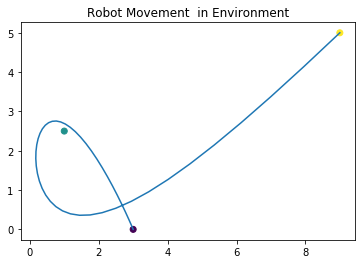

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
pts = np.array([[3,0],[1,2.5],[9,5]])
ax.scatter(pts[:,0],pts[:,1], c=[1,5,9])
plt.plot(xt,yt)
plt.title('Robot Movement  in Environment')
plt.show()

In [ ]:
xt = []
yt = []
for time in t:
    tao=(time-0)/(5-0)
#     print(x[0]*(1-tao)**5+x[1]*5*tao*(1-tao)**4+x[2]*10*(tao**2)*(1-tao)**3+x[3]*5*(tao**4)*(1-tao)**1+x[4]*(tao**5))
    xt.append(x[0]*(1-tao)**5+x[1]*5*tao*(1-tao)**4+x[2]*10*(tao**2)*(1-tao)**3+x[3]*5*(tao**4)*(1-tao)**1+x[4]*(tao**5))
    yt.append(y[0]*(1-tao)**5+y[1]*5*tao*(1-tao)**4+y[2]*10*(tao**2)*(1-tao)**3+y[3]*5*(tao**4)*(1-tao)**1+y[4]*(tao**5))

In [64]:
rows = [] 
vxt = []
vyt = [] 
d = 5-0
for time in t:
    T = (time-0)/(5 - 0)
    temp = [-5*((1-T)**4)/d, 5/d*(-4*(T**1)*(1-T)**3)+5/d*(1-T)**4, 10/d*(-3*(T**2)*(1-T)**2)+10/d*(2*T)*(1-T)**3, 10/d*(-2*(T**3)*(1-T))+10/d*(3*T**2)*(1-T)**2, 5/d*(-1*(T)**4)+5/d*(4*T**3)*(1-T), 5/d*T**4 ]
    vxt.append(x@temp)
    vyt.append(y@temp)

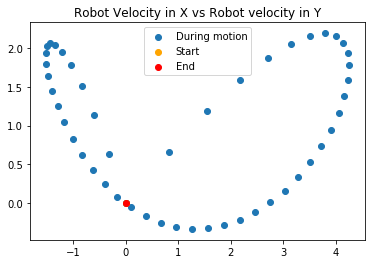

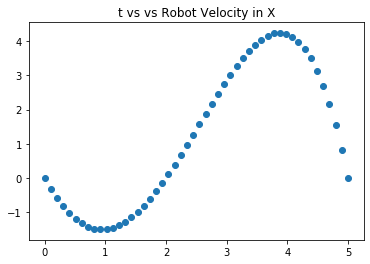

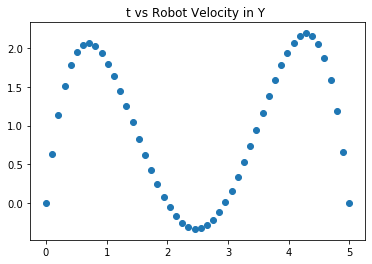

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
# pts = np.array([[3,0],[1,2.5],[9,5]])
# ax.scatter(pts[:,0],pts[:,1], c=[1,5,9])
plt.scatter(vxt,vyt, label = 'During motion')
plt.scatter(vxt[0],vyt[0],c='orange', label = 'Start')
plt.scatter(vxt[49],vyt[49],c='red', label = 'End')
plt.title('Robot Velocity in X vs Robot velocity in Y')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
# pts = np.array([[3,0],[1,2.5],[9,5]])
# ax.scatter(pts[:,0],pts[:,1], c=[1,5,9])
plt.scatter(t,vxt)
plt.title('t vs vs Robot Velocity in X')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
# pts = np.array([[3,0],[1,2.5],[9,5]])
# ax.scatter(pts[:,0],pts[:,1], c=[1,5,9])
plt.scatter(t,vyt)
plt.title('t vs Robot Velocity in Y ')
plt.show()

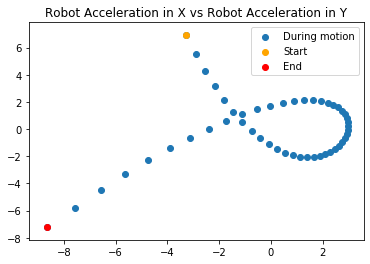

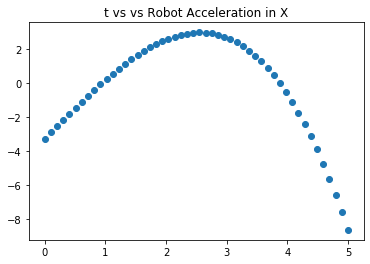

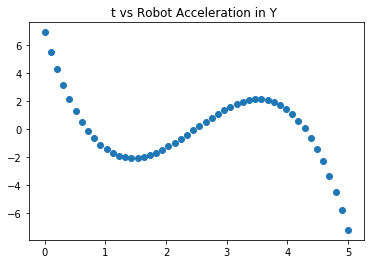

In [66]:
rows = [] 
axt = []
ayt = [] 
d = 5-0
for time in t:
    T = (time-0)/(5 - 0)
    temp = [4/5*(1-T)**3,-2*4/5*(1-T)**3 + 12/5*(1-T)**2*(T) , (-2*12/5*(1-T)**2*(T) + 4/5*(1-T)**3) + 12/5*(1-T)*(T)**2 , (-2*12/5*(1-T)*(T)**2 +12/5*(1-T)**2*(T)) + 4/5*(T)**3, 12/5*(1-T)*(T)**2 -2*4/5*(T)**3,4/5*(T)**3 ] 
    axt.append(x@temp)
    ayt.append(y@temp)
    
fig = plt.figure()
ax = fig.add_subplot(111)
# pts = np.array([[3,0],[1,2.5],[9,5]])
# ax.scatter(pts[:,0],pts[:,1], c=[1,5,9])
plt.scatter(axt,ayt, label = 'During motion')
plt.scatter(axt[0],ayt[0],c='orange', label = 'Start')
plt.scatter(axt[49],ayt[49],c='red', label = 'End')
plt.title('Robot Acceleration in X vs Robot Acceleration in Y')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
# pts = np.array([[3,0],[1,2.5],[9,5]])
# ax.scatter(pts[:,0],pts[:,1], c=[1,5,9])
plt.scatter(t,axt)
plt.title('t vs vs Robot Acceleration in X')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
# pts = np.array([[3,0],[1,2.5],[9,5]])
# ax.scatter(pts[:,0],pts[:,1], c=[1,5,9])
plt.scatter(t,ayt)
plt.title('t vs Robot Acceleration in Y ')
plt.show()

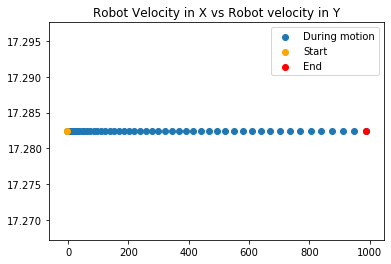

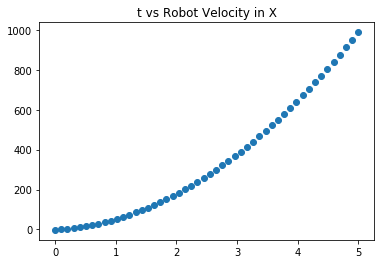

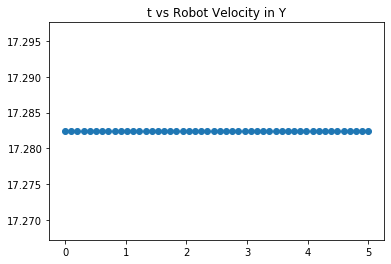

In [67]:
axt = 3 * 4 * x[0] * (t*t) + 2 * 3* x[1] * (t) + 2 * x[2]
ayt = 3 * 4 * y[0] * (t*t) + 2 * 3 * y[1] * (t) + 2 * y[2]
fig = plt.figure()
ax = fig.add_subplot(111)
# pts = np.array([[3,0],[1,2.5],[9,5]])
# ax.scatter(pts[:,0],pts[:,1], c=[1,5,9])
plt.scatter(axt,ayt, label = 'During motion')
plt.scatter(axt[0],ayt[0],c='orange', label = 'Start')
plt.scatter(axt[49],ayt[49],c='red', label = 'End')
plt.title('Robot Velocity in X vs Robot velocity in Y')
plt.legend()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
# pts = np.array([[3,0],[1,2.5],[9,5]])
# ax.scatter(pts[:,0],pts[:,1], c=[1,5,9])
plt.scatter(t,axt)
plt.title('t vs Robot Velocity in X')
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
# pts = np.array([[3,0],[1,2.5],[9,5]])
# ax.scatter(pts[:,0],pts[:,1], c=[1,5,9])
plt.scatter(t,ayt)
plt.title('t vs Robot Velocity in Y')
plt.show()